# 1. Data Processing: 

a)

In [2]:
import pandas as pd
import numpy as np
path = "Downloads/ProviderInfo.csv"
df = pd.read_csv(path)
df = df.select_dtypes([np.number])
df.drop(columns=['ZIP', 'PHONE'], inplace=True)
df.shape

(15617, 28)

b)

In [3]:
df.replace(["NaN", 'NaT'], np.nan, inplace = True)
df = df.dropna()
df.shape

(14557, 28)

c)

In [4]:
y = df["OVERALL_RATING"]
x = df.loc[:, df.columns != 'OVERALL_RATING']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

d)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model 1: Logistic Regression

a)

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_train_logpred = log_reg.predict(X_train_scaled)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


b)

In [7]:
print("The training score is", log_reg.score(X_train_scaled, y_train))

The training score is 0.6989265779304422


c)

In [8]:
y_test_logpred = log_reg.predict(X_test_scaled)

print("The testing score is", log_reg.score(X_test_scaled, y_test))

from sklearn import metrics
print("Testing Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_test_logpred))
print("Testing Classification Report")
print(metrics.classification_report(y_test, y_test_logpred))

The testing score is 0.6947115384615384
Testing Confusion Matrix
[[268  77   0   0   0]
 [ 76 427  97   6   0]
 [  0 187  59 235   0]
 [  0  88   3 450  99]
 [  0   0   0  21 819]]
Testing Classification Report
              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78       345
         2.0       0.55      0.70      0.62       606
         3.0       0.37      0.12      0.18       481
         4.0       0.63      0.70      0.67       640
         5.0       0.89      0.97      0.93       840

    accuracy                           0.69      2912
   macro avg       0.64      0.66      0.64      2912
weighted avg       0.66      0.69      0.67      2912



d) Based on the confusion matrix and classification report, do any of the classes get predicted exceptionally poorly? If so, comment briefly on what might be causing this to happen (Hint: Very open-ended). 

Answer: Based on the confusion matrix and classification report, class 3 get predicted exceptionally poorly. In particular, class 3 samples tend to be predicted as class 2 or class 4. One of the reasons why class 3 get predicted exceptionally poorly is because class 2, 3 and 4 are not well separated. For instance, let's say class 2, 3 and 4 are all normally distributed with very similar distribution parameters (similar mean and standard deviation). Since the distribution curves between these classes overlap, one sample could be easily mis-classified. Especially, when the distribution parameters of class 3 is in between the distribution parameters of class 2 and 4, then the probability of mis-classifying class 3 is even higher because both tails of the distribution curve could be overlapping with class 2 and 4. This would also explain why class 2 and class 4 have a relatively lower precision rate as compared to class 1 and class 5.

e)

In [9]:
print("Training Confusion Matrix")
print(metrics.confusion_matrix(y_train, y_train_logpred))
print("Training Classification Report")
print(metrics.classification_report(y_train, y_train_logpred))

Training Confusion Matrix
[[1064  289    1    0    0]
 [ 259 1632  381   20    0]
 [   0  744  270  898    0]
 [   0  404   11 1847  416]
 [   0    0    0   83 3326]]
Training Classification Report
              precision    recall  f1-score   support

         1.0       0.80      0.79      0.79      1354
         2.0       0.53      0.71      0.61      2292
         3.0       0.41      0.14      0.21      1912
         4.0       0.65      0.69      0.67      2678
         5.0       0.89      0.98      0.93      3409

    accuracy                           0.70     11645
   macro avg       0.66      0.66      0.64     11645
weighted avg       0.67      0.70      0.67     11645



Question: Are there signs of overfitting? Why or why not?

Answer: There is no sign of overfitting because the testing and training precision rates and recall rates for each class as well as the overall accuracy rate are very similar, which suggest that there is no obvious overfitting in the training model. A sign of overfitting is when the training accuracy score and precision rates and/or recall rates are high while the testing accuracy score and precision rates and/or recall rates are low.

f)

In [25]:
log_reg.predict_proba(X_test_scaled)

array([[6.58906020e-09, 3.75410109e-03, 1.68031010e-02, 1.72631296e-01,
        8.06811496e-01],
       [3.70699577e-06, 2.18008980e-02, 1.56222331e-01, 3.58146767e-01,
        4.63826297e-01],
       [2.74010264e-01, 8.65006648e-02, 3.62060328e-01, 2.77428740e-01,
        3.05939194e-09],
       ...,
       [5.60886577e-05, 4.82358570e-02, 3.35444598e-01, 5.32382282e-01,
        8.38811743e-02],
       [2.14712395e-01, 4.64693062e-01, 1.91341872e-01, 1.29252605e-01,
        6.62035829e-08],
       [5.63467504e-03, 6.27700659e-01, 1.89639347e-01, 1.76967752e-01,
        5.75662517e-05]])

# 3. Model 2: PCA(n_components = 2) + Logistic Regression

a)

In [11]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)

X_train_pca_2 = pca_2.fit_transform(X_train_scaled)
X_test_pca_2  = pca_2.transform(X_test_scaled)

b)

In [12]:
log_reg_pca_2 = LogisticRegression().fit(X_train_pca_2, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


c)

In [13]:
y_test_pca2_pred = log_reg_pca_2.predict(X_test_pca_2)

from sklearn import metrics
print("Testing Confusion Matrix for PCA 2")
print(metrics.confusion_matrix(y_test, y_test_pca2_pred))
print("Testing Classification Report for PCA 2")
print(metrics.classification_report(y_test, y_test_pca2_pred))

Testing Confusion Matrix for PCA 2
[[136 164   0  18  27]
 [117 237   1  38 213]
 [ 47 179   1  36 218]
 [ 18 123   0  47 452]
 [  6 104   0  54 676]]
Testing Classification Report for PCA 2
              precision    recall  f1-score   support

         1.0       0.42      0.39      0.41       345
         2.0       0.29      0.39      0.34       606
         3.0       0.50      0.00      0.00       481
         4.0       0.24      0.07      0.11       640
         5.0       0.43      0.80      0.56       840

    accuracy                           0.38      2912
   macro avg       0.38      0.33      0.28      2912
weighted avg       0.37      0.38      0.30      2912



d)

In [14]:
y_train_pca2_pred = log_reg_pca_2.predict(X_train_pca_2)

from sklearn import metrics
print("Training Confusion Matrix for PCA 2")
print(metrics.confusion_matrix(y_train, y_train_pca2_pred))
print("Training Classification Report for PCA 2")
print(metrics.classification_report(y_train, y_train_pca2_pred))

Training Confusion Matrix for PCA 2
[[ 532  631    1   67  123]
 [ 385  937    0  194  776]
 [ 150  700    0  194  868]
 [  99  571    0  189 1819]
 [  36  373    1  188 2811]]
Training Classification Report for PCA 2
              precision    recall  f1-score   support

         1.0       0.44      0.39      0.42      1354
         2.0       0.29      0.41      0.34      2292
         3.0       0.00      0.00      0.00      1912
         4.0       0.23      0.07      0.11      2678
         5.0       0.44      0.82      0.57      3409

    accuracy                           0.38     11645
   macro avg       0.28      0.34      0.29     11645
weighted avg       0.29      0.38      0.31     11645



Question: Are there signs of overfitting? Why or why not?

Answer: There is no sign of overfitting because none of the training precision rate and recall rate is significantly higher than the testing precision rate and recall rate. More specifically, class 1, 2, 4, and 5 have very similar testing and training precision rates and recall rates with respect to each class. On contrast, the training precision rate and recall rate for class 3 is significantly lower than the testing precision rate and recall rate, which might be a indication of such model is underfitting for class 3. One of the reasons might be the two PCA components selected did a reasonable job on classifying class 1,2,4,5 but did poorly on classifying class 3 due to too much information loss. 

e) How well does this model perform relative to Model 1? Explain why there is a shift in performance.

Answer: This model performs worse relative to model 1; it has a lower precision rate, recall rate, accuracy rate, and its less stable (the training and testing precision rate for class 3 for this model changed significantly). We would expect this model to perform poorly as compared to model 1 since we use all the features in model 1 while for this model we only use 2 PCA components. The poor performance of this model might be an indication that 2 PCA components are not enough to correctly classify all 5 classes. In other words, we loss too much information when we only keep 2 PCA components, which are not sufficient to explain the variances. 

# 4. Model 3: PCA(n_components = 16) + Logistic Regression

a)

In [15]:
pca_16 = PCA(n_components=16)

X_train_pca_16 = pca_16.fit_transform(X_train_scaled)
X_test_pca_16  = pca_16.transform(X_test_scaled)

b)

In [16]:
log_reg_pca_16 = LogisticRegression().fit(X_train_pca_16, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


c)

In [17]:
y_test_pca16_pred = log_reg_pca_16.predict(X_test_pca_16)

from sklearn import metrics
print("Testing Confusion Matrix for PCA 16")
print(metrics.confusion_matrix(y_test, y_test_pca16_pred))
print("Testing Classification Report for PCA 16")
print(metrics.classification_report(y_test, y_test_pca16_pred))

Testing Confusion Matrix for PCA 16
[[259  86   0   0   0]
 [ 73 433  95   5   0]
 [  0 185  52 244   0]
 [  0  90   1 437 112]
 [  0   0   0  17 823]]
Testing Classification Report for PCA 16
              precision    recall  f1-score   support

         1.0       0.78      0.75      0.77       345
         2.0       0.55      0.71      0.62       606
         3.0       0.35      0.11      0.17       481
         4.0       0.62      0.68      0.65       640
         5.0       0.88      0.98      0.93       840

    accuracy                           0.69      2912
   macro avg       0.64      0.65      0.63      2912
weighted avg       0.65      0.69      0.66      2912



d)

In [18]:
y_train_pca16_pred = log_reg_pca_16.predict(X_train_pca_16)

from sklearn import metrics
print("Training Confusion Matrix for PCA 16")
print(metrics.confusion_matrix(y_train, y_train_pca16_pred))
print("Training Classification Report for PCA 16")
print(metrics.classification_report(y_train, y_train_pca16_pred))

Training Confusion Matrix for PCA 16
[[1062  291    1    0    0]
 [ 261 1647  358   26    0]
 [   0  746  252  914    0]
 [   0  402    5 1789  482]
 [   0    0    0   83 3326]]
Training Classification Report for PCA 16
              precision    recall  f1-score   support

         1.0       0.80      0.78      0.79      1354
         2.0       0.53      0.72      0.61      2292
         3.0       0.41      0.13      0.20      1912
         4.0       0.64      0.67      0.65      2678
         5.0       0.87      0.98      0.92      3409

    accuracy                           0.69     11645
   macro avg       0.65      0.66      0.64     11645
weighted avg       0.67      0.69      0.67     11645



Question: Are there signs of overfitting? Why or why not?

Answer: There is no sign of overfitting because the testing and training precision rates and recall rates for each class as well as the overall accuracy rate are very similar, which suggest that there is no obvious overfitting in the training model. A sign of overfitting is when the training accuracy score and precision rates and/or recall rates are high while the testing accuracy score and precision rates and/or recall rates are low.

# 5. Conceptual Questions: 

a) In order to better understand what is happening in Model 2 & Model 3, rerun PCA without specifying a number of components. Plot out the cumulative explained variance ratio vs number of components for the original scaled data. Describe what the plot is showing as well as what the cumulative explained variance tells us about our data.
Helpful link: https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff

Text(0, 0.5, 'cumulative explained variance')

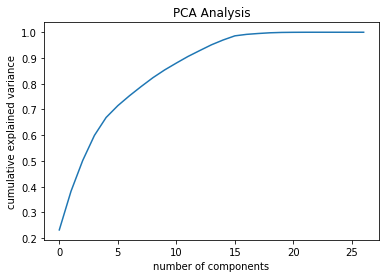

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Analysis')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


Answer: Based on the PCA Analysis plot, we can see that the cummulative explained variance are increasing very significantly from 0 PCA component to 5 PCA components, and it is still increasing (even though it has a slightly flatter slope) until the number of components reaches around 15 and the cummulative explained variance rate reaches around 0.95. After that, we can see that the cummulative explained variance does not have a noticable increase, and the cummulative explained variance rate stayed at around 0.95 from 15 PCA components to 25 PCA components. The cummulative explained variance curve tells us that if we want to explain 95% of the variance, we would need at least 15 PCA components, it also explained why model 2 with 2 PCA components performs poorly as compared to model 3 with 16 PCA components. Another insight from this graph is adding any PCA component beyond 15 PCA components does not add value since the cummulative explained variance does not increase significantly.

b) Between Model 2 and Model 3, which performed the best? Explain why this is.

Answer: Based on model performance, model 3 out-performed model 2 since it has a significantly higher precision rate, recal rate, and accuracy rate. This can be explained using the PCA analysis graph above. As we can see, with 2 PCA components, the cummulative variance explained is only around 0.4, and the cummulative variance explained curve is still increasing significantly after N=2, meaning that adding more components will still help explain the variance significantly. Thus we can conclude that 2 PCA components is not enough to explain the variances in the model. On the other hand, we can see that 16 PCA component has a cummulative variance explained rate of 0.95, and the curve stop increasing significantly after this, which means all 16 PCA components contributed significantly in explaining the variance, and adding any further components does not add too much value in terms of variance explained.

c) Assuming you are working with a company on a modeling project with a massive data set, what would be some of the benefits of utilizing PCA? 

Answer: One of the benefits of utilizing PCA are while reducing the dimension of our data, we can select the number of components to retain so that we do not more information than necessary. Using the cummulative explained variance plot, we can see the cut-off numbers of components for a target cummulative explained variance rate. In this way, we can adjust the number of components we need to retained based on the target rate. Another benefit of utilizing PCA is being able to see how the cummulative explained variance curve change and when does it starting flatten out. If the curve is no longer increasing after reaching a certain number of components, we can conclude that adding any additional components will not help explaining the variance, hence, we can consider dropping those components. This will also help prevent overfitting as adding those components that do not improve the performance of the model might cause overfitting.  

d) Now argue the opposite of question 3 - what is a negative result of utilizing this  dimensionality reduction technique?

Answer: One negative result of utilizing PCA is the loss of interpretabilities. Since the principal components are linear combination of the original features, the principal components are not easily readable and interpretable to explain the model.

e) sklearn offers a variety of methods to solve a multiclass logistic regression problem. One option is the "one-vs-the-rest" (also known as "one-vs-all" method). Explain in detail what this process does.

Hint: Run the .predict_proba() method for one of your prior models to have a better understanding of "one-vs-the-rest" output.

Answer: “One-vs-the rest" method means when we are performing a multiclass classification problem, we treat one class as class A and the rest of the classes as class B, and by then we turn a multiclass logistic regression problem into a two class logistic regression problem. We perform this procedures for all the individual class (let's say we have n class, then we will perform this two class logistic regression n times). With this, we will be able to calculate the probabilities of the sample belongs to each class. As shown below, the probability of our 1st testing sample belongs to class 1 is around 0, to class 2 is 0.24%, to class 3 is 2.2%, to class 4 is 14%, and to class 5 is 0.83%. Therefore, this sample will be classified into class 5. 

In [31]:
log_reg_pca_16.predict_proba(X_test_pca_16)

array([[3.95961898e-08, 2.41021771e-03, 2.21733442e-02, 1.41947004e-01,
        8.33469395e-01],
       [4.53574582e-06, 2.19902318e-02, 1.55078750e-01, 3.59828979e-01,
        4.63097503e-01],
       [2.74096751e-01, 8.29467632e-02, 3.54708008e-01, 2.88248469e-01,
        8.44746817e-09],
       ...,
       [5.85138689e-05, 4.73997680e-02, 3.24211966e-01, 5.37924732e-01,
        9.04050195e-02],
       [2.52016647e-01, 4.40222496e-01, 1.90815570e-01, 1.16945199e-01,
        8.70043490e-08],
       [7.79104941e-03, 6.18713784e-01, 1.96479289e-01, 1.76955374e-01,
        6.05038866e-05]])

f) Each of the three models utilized logistic regression. The Hands-On ML book describes the logistic function (sometimes called the sigmoid function) in detail. Using Equation 4-14, plot out the logistic function & describe why it is useful in classification problems of the nature covered in this homework assignment.

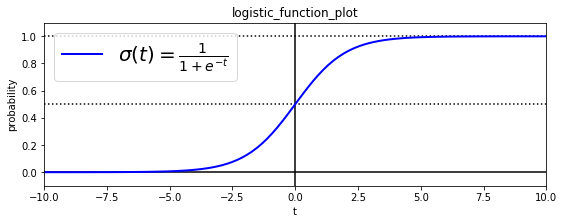

In [33]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.ylabel("probability")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title("logistic_function_plot")
plt.show()

Answer: For classification problem, we use logistic regression rather than normal linear regression. One of the main reason is logistic function can combat the problem of outliners. If we are splitting and classifying our samples using a straight line, this line could be heavily affected by outliners (having a flatter slope in order to include this outliner), which will affect the accuracy of classification of the non-outliner samples. Logistic regression function, as shown above, solve this problem. The both tails of the function are flatten so that we can our outliners will be included in the tails without affecting the classification of the non-outliner samples. The output of a logistic function is restricted within 0 to 1, which is the probability of a sample belonging to a class. With the probability outputs, we need to decide a threshold to classify which class does out sample belongs to (e.g. the most common threshold is 0.50; if a sample has a probabitlity below 0.5, it will be classified to class 1, otherwise, it will be classified to class 2.) We can adjust the probability threshold for better precision or recall rate.   